In [1]:
import glob

In [38]:
filename = glob.glob("all_text_data/*.text")

In [31]:
f = open('all_text_data/【あつまれ どうぶつの森】全住民383人の人気ランキング！TOP10に入ったのは一体誰だ!【あつ森】【ぽんすけ】.txt', 'r', encoding='UTF-8')

In [2]:
import numpy as np
import pandas as pd

In [44]:
with open('all_text_data/【あつまれ どうぶつの森】全住民383人の人気ランキング！TOP10に入ったのは一体誰だ!【あつ森】【ぽんすけ】.txt') as f:
    print(f.read())

['どうも僕ですいつもありがとうございます今日ですねどこなんですけれども皆さん好きな住民はいますか本当ですねこの子だったらグラサン女の子だったらどれみちゃんが好きなんですけれどもふと思いましてこの例えば僕の好きな二人の住民ってみんなが好きな住民ランキングの中だと一体何位なんだろうと疑問に思いでも後悔はねぽん助かみんなが選ぶ住民ランキングを作ってみました入ったとはいってもですね今回はその数ある人気投票をすべて合算した上で1位から10位を出したいと思いますでポイント計算に関しては結構簡単に説明すると例えば a のサイトだととんすけの順位順位が1位でした手順ポイント b のサイトだとぽんすけの順位', '3位でした8ポイントを貯めて1位から10位までが50ポイントから1ポイントになっているって言う感じで簡単にまとめてますでさっきとか出てきたぽん助は合計で18ポイント差になるんでしょうっていう感じでまとめてみましたはいではさっくり行きますよもう行きますからねでは第10位ロボです出ました狼族もうかっこいいかっこいいんですよ狼はね本当に男も女もかっこいいですが実はこのロボですねましょうないからね初代の六曜のどうぶつの森から参戦している反転しているいる住民でございまして強いタイプを頂いて結構あの優しい感じなんですけれどもねそのロボが10位にランクインです続いて第9位は雪ですハミングだね見た目のキャラクターハムスターどこの住民ですね', 'なるので結構新しい目なんですけれどももう9位に入ってくるというこのなんだろう実力の持ち主でございます今まで本当にかわいいでございますでも BGM がね田舎の BGM が歌って歌って歌っての夢だったりとかねするという追加要素もありながらは結構人気のあるキャラでございますそして第8位は誰', 'このねちょっと半分寝ぼけてる感じの猫の顔がキュートなネコちゃんでございます初めて見た時はね女の子だと思ってたんですがまあ男の子でちなみにぼんやりタイプなんで僕が一人称なんですけどさじゃ僕かなって思ったんですけどはいお酢でそんなビンタが8位ランクインはですね肉番です8位7位と続いて猫が来ておりますが初代の印象が結構強いに来たんですがこの猫もおす男のキャラの中だと結構人気の高い住民なんじゃないでしょうかちなみにね名前の由来はあれなんじゃないかなって言われてますね猫

In [51]:
a=pd.read_table('all_text_data/【あつまれ どうぶつの森】全住民383人の人気ランキング！TOP10に入ったのは一体誰だ!【あつ森】【ぽんすけ】.txt', header=None, sep=",")




###############################################################
#テキストファイルをcsvファイルに変換
#ぽんすけ、まひと、キヨなどフォルダに分かれており、それぞれのテキストをフォルダごとにcsv化する。

In [3]:
import os

In [120]:
# txt_file_path = glob.glob("./speech-to-text/*/*.txt")#フォルダ内の全人が選択され、テキストファイルのものが対象
txt_file_path = glob.glob("./speech-to-text/*/*.txt")#フォルダ内の全人が選択され、テキストファイルのものが対象


In [121]:
for x in txt_file_path:
    player=x.split("/")[2]
    
    file_name = x.split("/")[-1].split(".")[0]
    path_name = "{}_change.csv".format(file_name)
    
    out_root_path = "text_to_speech/{}".format(player)
    if not os.path.exists(out_root_path):
        os.mkdir(out_root_path)
    
    text_file = pd.read_table(x, header=None, sep=",")
    df_text_file = text_file.T
    df_text_file = df_text_file.rename(columns={0:"text"})
    df_text_file.to_csv("{}/{}".format(out_root_path,path_name))
    

In [4]:
path_list = glob.glob('./text_to_speech/*/*.csv')

In [ ]:
%%time
#G_score = []
for target_file in path_list:
    player=target_file.split("/")[2]

    file_name = target_file.split("/")[-1].split(".")[0].split("_")[0]
    path_name = "{}_emotion.csv".format(file_name)
    out_root_path = "point/{}".format(player)
    if not os.path.exists(out_root_path):
        os.mkdir(out_root_path)
        
    G_score = []
    df_target = pd.read_csv(target_file,index_col=False)
    for i,t in enumerate(df_target.text):
        G_score.append(analyze_sentiment(t))
        print("\r{}".format(i),end='')
    df_target['G_score'] = [d.score for d in G_score]
    df_target['magnitude'] = [d.magnitude for d in G_score]
    df_target.to_csv("{}/{}".format(out_root_path,path_name))

13

In [113]:
txt_file_path

['./speech-to-text/キヨ/お前ら仲悪いだろ【あつまれ どうぶつの森】#11.csv']

###############################################################
#感情分析api　Google sentimental analyst　
変換したcsvから感情得点化を行う

In [2]:

import os

import pandas as pd
from google.cloud import language_v1
from google.cloud.language_v1 import enums
import six
import matplotlib.pyplot as plt

pd.options.display.precision = 100

In [8]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS']  = 'sgj-onp-84b5e1897e24.json'
client = language_v1.LanguageServiceClient()

def analyze_sentiment(content):

    if isinstance(content, six.binary_type):
        content = content.decode('utf-8')
        
    type_ = enums.Document.Type.PLAIN_TEXT
    document = {'type': type_, 'content': content}
    response = client.analyze_sentiment(document)
    sentiment = response.document_sentiment
    
    return sentiment

In [110]:
filelist = glob.glob('./text_to_speech/*/*.csv')

In [ ]:
%%time
G_score = []
for i,t in enumerate(df.text):
    G_score.append(analyze_sentiment(t))
    print("\r{}".format(i),end='')

In [ ]:
df['G_score'] = [d.score for d in G_score]
df['magnitude'] = [d.magnitude for d in G_score]

In [ ]:
df.head()

###########################################
#折れ線グラフ化

In [90]:

import pandas as pd
import matplotlib.pyplot as plt
 

In [89]:
mahito = pd.read_csv('point/まひと.csv',encoding = 'UTF8')
mahito

,Unnamed: 0,player_name,title,bpm,stdev,bigining,middle,last,frequency,decibel,subscribers,view,view_revised
0,0,まひと,【あつ森】島の住人全員を牢屋の中に60年間、閉じ込めてみた結果wwwww【あつまれどうふ...,128.023783699999995633334037847816944122314453...,17.1199408300000008864572009770199656486511230...,17.5315568000000006065874913474544882774353027...,12.3221799199999999530064087593927979469299316...,3.50631136000000021013534023950342088937759399...,390.39065659999999979845597408711910247802734375,-16.7616100400000007653034117538481950759887695...,803000,787302,98.0450809499999991203367244452238082885742187...
1,1,まひと,【あつ森】100時間かけて作った自然災害で破壊された崩壊都市からの脱出ゲーム島が想像を...,143.205069300000019438812159933149814605712890...,32.3929503000000025281224225182086229324340820...,7.05394190899999973254352880758233368396759033...,16.4789567300000001637272362131625413894653320...,54.9792531100000019250728655606508255004882812...,668.11470470000006116606527939438819885253906250,-17.4624201399999989803291100542992353439331054...,803000,633526,78.8948941499999989446223480626940727233886718...
2,2,まひと,【あつ森】本当は教えたくない知っているだけで差がつく5つ星島まで最短で行く方法!!...,131.168282599999997728446032851934432983398437...,24.5748858500000011417796486057341098785400390...,47.3053892200000021261985239107161760330200195...,8.63986313100000025144709070445969700813293457...,42.2155688599999976418075675610452890396118164...,327.13821810000001732987584546208381652832031250,-17.1881093900000010421535989735275506973266601...,803000,382152,47.5905354900000006068694347050040960311889648...
3,3,まひと,【あつ森】鬼滅の刃のキャラ達と隠れんぼしたら、炭治郎が99,135.536092199999984586611390113830566406250000...,20.5331133900000004643970896722748875617980957...,8.88656560399999939647841529222205281257629394...,13.9646030900000006624850357184186577796936035...,34.5007841099999978951018420048058032989501953...,394.47022329999998646599124185740947723388671875,-17.7699224200000003293098416179418563842773437...,803000,1167568,145.400747199999983649831847287714481353759765...
4,4,まひと,【鬼滅の刃】あつ森初心者にもしも連れてきた我妻善逸が本物の声優さんと見せかけて声真似だっ...,134.274750100000005659239832311868667602539062...,24.5881791800000009118321031564846634864807128...,13.2743362799999999879219103604555130004882812...,12.1825077600000000188629201147705316543579101...,28.3588093299999997043414623476564884185791015...,591.69714529999998831044649705290794372558593750,-17.4829270399999998630846675951033830642700195...,803000,1831057,228.027023699999972450314089655876159667968750...
5,5,まひと,【あつ森】もしも鬼滅の刃のキャラ達があつ森にきたらこうなるwwwww【鬼滅の刃声真似あつま...,135.270011400000015555633581243455410003662109...,21.5333635699999987878072715830057859420776367...,0.00000000000000000000000000000000000000000000...,15.0332225899999993856681612669490277767181396...,13.3720930199999994414383763796649873256683349...,331.03735860000000457148416899144649505615234375,-17.7993042499999987171577231492847204208374023...,803000,887481,110.520672500000003424247552175074815750122070...
6,6,まひと,【あつ森】全員無料!! 最新アプデで追加される新商店新キャラ新イベントとネット無料チ...,124.988320500000000379259290639311075210571289...,13.9483234999999989867092153872363269329071044...,0.00000000000000000000000000000000000000000000...,14.0803754800000007207927410490810871124267578...,24.9828884299999991469576343661174178123474121...,495.97918870000000879372237250208854675292968750,-17.5820134299999999427654984174296259880065917...,803000,161930,20.1656288900000006947266228962689638137817382...
7,7,まひと,【あつ森】知らないと損!! 無料アプデのイースターエッグの効率的な入手方法イースターレ...,126.604358000000004835783329326659440994262695...,13.3387427200000008298275133711285889148712158...,85.2071005899999960320201353169977664947509765...,16.7371090399999999931424099486321210861206054...,24.8520710099999995179587131133303046226501464...,381.50648119999999607898644171655178070068359375,-18.0819157900000000438467395724728703498840332...,803000,135959,16.9313823200000008739607437746599316596984863...
8,8,まひと,【あつ森】初心者必見!! 知っておくべき詐欺師つねきちの商品を本物か偽物を100見分ける方...,122.128789599999990400647220667451620101928710...,15.99755249000000034698

TypeError: hist() missing 1 required positional argument: 'x'

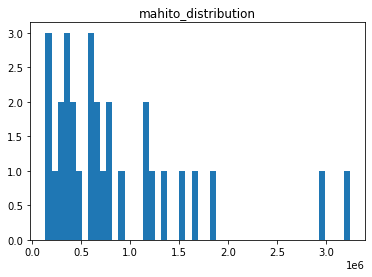

In [130]:
import pandas as pd
import numpy as np


# タイトル追加
plt.title('mahito_distribution')


mahi=mahito["view"].tolist()
# x軸にscore、y軸にfreq
plt.hist(mahi,bins=50)

# 目盛りを変更
# plt.xticks([50,75,80,100]) 
# plt.yticks([0,10,20,30,40,80,100])


plt.hist()
# plt.hist(mahi, range=(0, 100));

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
 
#CSVファイルをUTF-8形式で読み込む  1167568　1167568　116万
data = pd.read_csv('point/まひと/【あつ森】鬼滅の刃のキャラ達と隠れんぼしたら、炭治郎が99_emotion.csv',encoding = 'UTF8')
#dataを出力 
data

,Unnamed: 0,Unnamed: 0.1,text,G_score,magnitude
0,0,0,['今は大正時代あったかもしれない平和な島での生活今日は猫ちゃんと一緒に博物館で鬼ごっこね今...,0.10000000149011611938476562500000000000000000...,0.10000000149011611938476562500000000000000000...
1,1,1,'よっちゃんをに決めようか何かおかしいなと思ったわトイレ出しましたまたの機会じゃトイレ行っ...,-0.50000000000000000000000000000000000000000000...,0.50000000000000000000000000000000000000000000...
2,2,2,'虹色のでもう始まってんのええ待って待って待って待って待って待ってもいいボタンでダッシュで...,-0.40000000596046447753906250000000000000000000...,0.40000000596046447753906250000000000000000000...
3,3,3,'何もないよ安心して大変失礼致します今何をしていらっしゃいましたかよあの子も昨日の最近ゲッ...,-0.69999998807907104492187500000000000000000000...,0.69999998807907104492187500000000000000000000...
4,4,4,'はいここです今回の会場はこちらの博物館だれをにする',0.20000000298023223876953125000000000000000000...,0.20000000298023223876953125000000000000000000...
5,5,5,'それも新車のお前だよそれは僕僕に着いたら入ってきてくれ全員に入ったらわかったでもいいので...,-0.40000000596046447753906250000000000000000000...,0.40000000596046447753906250000000000000000000...
6,6,6,'情報提供しないこっちくんなやばいなこれマジで見つけずに終わりそう',0.30000001192092895507812500000000000000000000...,0.30000001192092895507812500000000000000000000...
7,7,7,'もうこれ今やってるよ鬼ごっこじゃないもんなこれかれも見ただってもんなますまず覚えきれない...,-0.80000001192092906610042746251565404236316680...,0.80000001192092906610042746251565404236316680...
8,8,8,'ごめんできないでいいんだぜんいつ鬼姉さん次郎は炊かないで家にいたから買ってきたよ前のやつ...,-0.50000000000000000000000000000000000000000000...,0.50000000000000000000000000000000000000000000...
9,9,9,'魚の方が広いかな魚の方で行きますかでじゃんけんしようじゃんけん次はちゃんとお人間行けたよ...,0.00000000000000000000000000000000000000000000...,0.00000000000000000000000000000000000000000000...


【あつ森】鬼滅の刃のキャラ達と隠れんぼしたら、炭治郎が99_emotion.csv  1167568回　　145.4007472

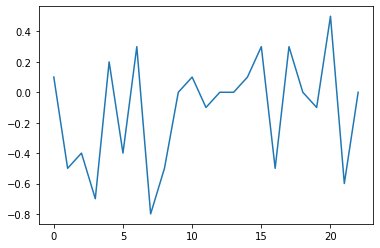

In [221]:
# data.plot(G_score,Unnamed: 0)
data["G_score"].plot()



あつ森】”鬼滅の刃”を完全再現した島クリエイターの本気の島が想像を絶する凄さだったんだがwww 機能回復訓練やあの名シーンが・・【あつまれどうぶつの森鬼滅の刃 炭治郎鬼 善逸　冨岡義勇 】_emotion.csv',　　1683024回　　　　　　　209.5920299

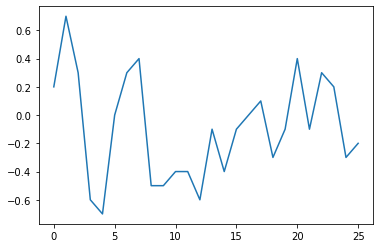

In [222]:
#CSVファイルをUTF-8形式で読み込む
data2= pd.read_csv('point/まひと/【あつ森】”鬼滅の刃”を完全再現した島クリエイターの本気の島が想像を絶する凄さだったんだがwww 機能回復訓練やあの名シーンが・・【あつまれどうぶつの森鬼滅の刃 炭治郎鬼 善逸　冨岡義勇 】_emotion.csv',encoding = 'UTF8')
#dataを出力
data2["G_score"].plot()

【あつ森】60年後の世界に行って、住人に話しかけたら本当に大変なことが起きていた。。【あつまれどうぶつの森】_emotion.csv'
643879回　　　　　　　　　80.18418431

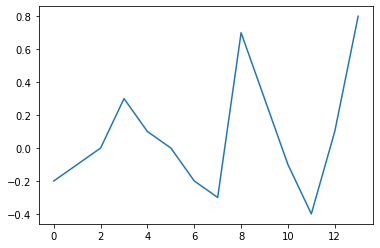

In [223]:
#CSVファイルをUTF-8形式で読み込む
data3= pd.read_csv('point/まひと/【あつ森】60年後の世界に行って、住人に話しかけたら本当に大変なことが起きていた。。【あつまれどうぶつの森】_emotion.csv',encoding = 'UTF8')
#dataを出力
data3["G_score"].plot()

【あつ森】100万ベル盗んで世界一ヤバイ刑務所に閉じ込められたから、全力で脱獄する脱獄ゲームが面白すぎたwww【あつまれどうぶつの森脱獄ゲーム】_emotion.csv'
1371495回　　　　　　　170.7963885

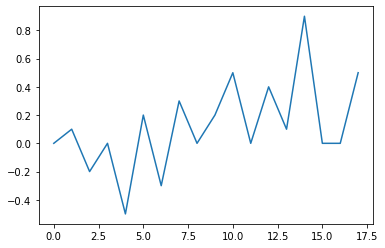

In [224]:
#CSVファイルをUTF-8形式で読み込む
data4= pd.read_csv('point/まひと/【あつ森】100万ベル盗んで世界一ヤバイ刑務所に閉じ込められたから、全力で脱獄する脱獄ゲームが面白すぎたwww【あつまれどうぶつの森脱獄ゲーム】_emotion.csv',encoding = 'UTF8')
#dataを出力
data4["G_score"].plot()

【あつ森】Twitterで約400万再生された島クリエイターの本気の島がガチで想像を絶するヤバさだった。もう現実世界なんだがww【あつまれどうぶつの森】_emotion.csv
3245220回　　　　　404.1369863


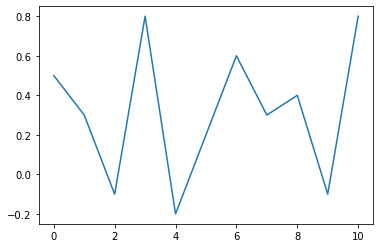

In [225]:

#CSVファイルをUTF-8形式で読み込む
data5= pd.read_csv('point/まひと/【あつ森】Twitterで約400万再生された島クリエイターの本気の島がガチで想像を絶するヤバさだった。もう現実世界なんだがww【あつまれどうぶつの森】_emotion.csv',encoding = 'UTF8')
#dataを出力
data5["G_score"].plot()

あつ森】ハリー・ポッターのホグワーツ城や名シーンを完全再現した島クリエイターの本気の島が想像を絶する凄さだったww ホグワーツに入学【あつまれどうぶつの森Harry Potter スリザリン】_emotion.csv'
738834回   92.00921544

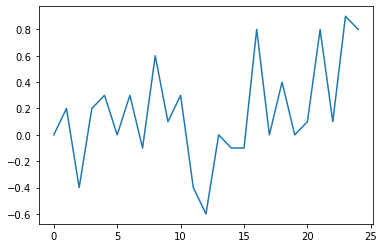

In [226]:

#CSVファイルをUTF-8形式で読み込む
data6= pd.read_csv('point/まひと/【あつ森】ハリー・ポッターのホグワーツ城や名シーンを完全再現した島クリエイターの本気の島が想像を絶する凄さだったww ホグワーツに入学【あつまれどうぶつの森Harry Potter スリザリン】_emotion.csv',encoding = 'UTF8')
#dataを出力  
data6["G_score"].plot()

あつ森】ヤンキーの島で激レアアイテムを奪ったら、ブチギレて大変なことになったんだがww【あつまれどうぶつの森鬼滅の刃 鬼ごっこ】_emotion.csv'
607231回     75.62029888

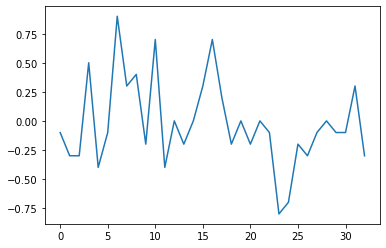

In [227]:
#CSVファイルをUTF-8形式で読み込む
data7= pd.read_csv('point/まひと/【あつ森】ヤンキーの島で激レアアイテムを奪ったら、ブチギレて大変なことになったんだがww【あつまれどうぶつの森鬼滅の刃 鬼ごっこ】_emotion.csv',encoding = 'UTF8')
#dataを出力
data7["G_score"].plot()

【あつ森】最新アプデで追加の新イベントメーデー旅行券の離島ツアーが謎解き迷路でクリアしたら限定商品とお金が貰える神イベントすぎたwwww【あつまれどうぶつの森みしらぬネコ新離島ツアー】_emotion.csv
250364回    31.17858032

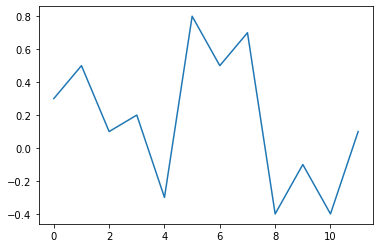

In [228]:
#CSVファイルをUTF-8形式で読み込む
data8= pd.read_csv('point/まひと/【あつ森】最新アプデで追加の新イベントメーデー旅行券の離島ツアーが謎解き迷路でクリアしたら限定商品とお金が貰える神イベントすぎたwwww【あつまれどうぶつの森みしらぬネコ新離島ツアー】_emotion.csv',encoding = 'UTF8')
#dataを出力
data8["G_score"].plot()

【あつ森】千と千尋の神隠しを完全再現した島クリエイターの本気の島が冗談抜きですごすぎたんだがwww【あつまれどうぶつの森animal crossing Spirited Away】_emotion.csv
1131493回     140.9082192

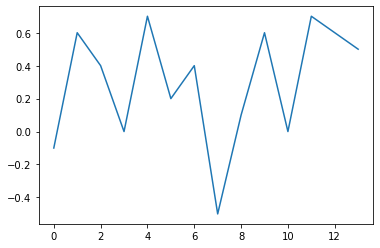

In [229]:
#CSVファイルをUTF-8形式で読み込む
data9= pd.read_csv('point/まひと/【あつ森】千と千尋の神隠しを完全再現した島クリエイターの本気の島が冗談抜きですごすぎたんだがwww【あつまれどうぶつの森animal crossing Spirited Away】_emotion.csv',encoding = 'UTF8')
#dataを出力
data9["G_score"].plot()

【あつ森】知らないと損するお金無限増殖バグをやってみた結果_emotion.csv
787302回      98.04508095

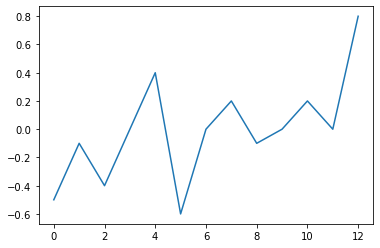

In [230]:
#CSVファイルをUTF-8形式で読み込む
data10= pd.read_csv('point/まひと/【あつ森】知らないと損するお金無限増殖バグをやってみた結果_emotion.csv',encoding = 'UTF8')
#dataを出力
data10["G_score"].plot()

【あつ森】発狂キッズにかくれんぼするフリをして、家の前に落とし穴を設置して罠にはめるドッキリwwww【あつまれどうぶつの森あっきぃドッキリ 】_emotion.csv',339320      42.25653798

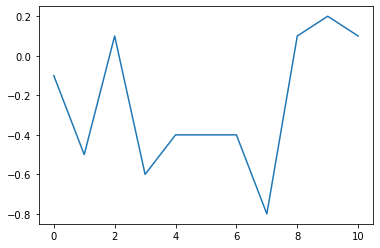

In [231]:
#CSVファイルをUTF-8形式で読み込む
data11= pd.read_csv('point/まひと/【あつ森】発狂キッズにかくれんぼするフリをして、家の前に落とし穴を設置して罠にはめるドッキリwwww【あつまれどうぶつの森あっきぃドッキリ 】_emotion.csv',encoding = 'UTF8')
#dataを出力 339320
data11["G_score"].plot()

【あつ森】本当は教えたくない知っているだけで差がつく5つ星島まで最短で行く方法!! 初心者必見!!【あつまれどうぶつの森攻略】_emotion.csv',382152回　47.59053549

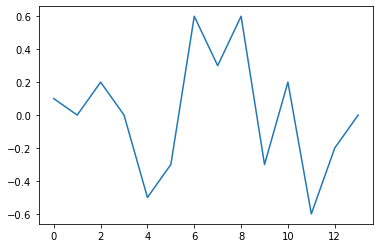

In [232]:
#CSVファイルをUTF-8形式で読み込む
data12= pd.read_csv('point/まひと/【あつ森】本当は教えたくない知っているだけで差がつく5つ星島まで最短で行く方法!! 初心者必見!!【あつまれどうぶつの森攻略】_emotion.csv',encoding = 'UTF8')
#dataを出力  382152
data12["G_score"].plot()

【あつ森】無料隠しアップデート今すぐ絶対に知らないと損な事・知っておきたい事14選!! これを知っているだけで差がつくマイルの貯め方や任天堂が炎上している件についてww【あつまれどうぶつの森攻略】_emotion.csv', 391408　　　　　　　　　　48.74321295

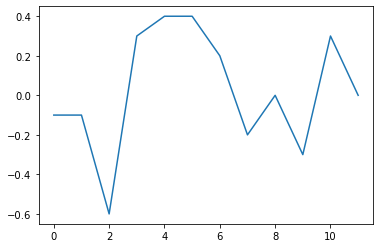

In [233]:
#CSVファイルをUTF-8形式で読み込む
data13= pd.read_csv('point/まひと/【あつ森】無料隠しアップデート今すぐ絶対に知らないと損な事・知っておきたい事14選!! これを知っているだけで差がつくマイルの貯め方や任天堂が炎上している件についてww【あつまれどうぶつの森攻略】_emotion.csv',encoding = 'UTF8')
#dataを出力 
data13["G_score"].plot()

【鬼滅の刃】あつ森初心者にもしも連れてきた我妻善逸が本物の声優さんと見せかけて声真似だったらドッキリ仕掛けたら、想像を絶する展開にwwwww【あつまれどうぶつの森鬼滅の刃声真似】_emotion.csv', 1831057　　　228.0270237

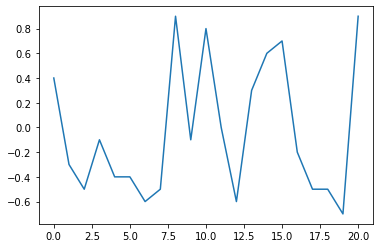

In [234]:
#CSVファイルをUTF-8形式で読み込む
data14= pd.read_csv('point/まひと/【鬼滅の刃】あつ森初心者にもしも連れてきた我妻善逸が本物の声優さんと見せかけて声真似だったらドッキリ仕掛けたら、想像を絶する展開にwwwww【あつまれどうぶつの森鬼滅の刃声真似】_emotion.csv',encoding = 'UTF8')
#dataを出力
data14["G_score"].plot()

In [300]:
data14

,Unnamed: 0,Unnamed: 0.1,text,G_score,magnitude
0,0,0,['皆さんこんにちは挨拶たけど今回なんですけど今回はですね僕の兄貴のあっきーさんにドッキリ仕...,0.40000000596046447753906250000000000000000000...,0.40000000596046447753906250000000000000000000...
1,1,1,'どうやさん今日はマイクですからあげあげた町ですそういう挨拶すればそれが僕が僕の妹に嫉妬し...,-0.30000001192092895507812500000000000000000000...,0.30000001192092895507812500000000000000000000...
2,2,2,'はいはいはいはいはいはいそれわかんないけどゲーム実況者も何も言わないのか分かるからそんな...,-0.50000000000000000000000000000000000000000000...,0.50000000000000000000000000000000000000000000...
3,3,3,'分かったのは誰が好きなのわかったわもうはいはいはいはい確かにマジでちょっとさー話しかけに...,-0.10000000149011611938476562500000000000000000...,0.10000000149011611938476562500000000000000000...
4,4,4,'何も買ってないやん俺偽物じゃないの何か質問とかしてみたよねずかちゃん俺のは確かに俺の何だ...,-0.40000000596046447753906250000000000000000000...,0.40000000596046447753906250000000000000000000...
5,5,5,'そうでしょそうでしょそれはねこれあげるからさ教えてくれないからねまた俺は男なんだねじゃあ...,-0.40000000596046447753906250000000000000000000...,0.40000000596046447753906250000000000000000000...
6,6,6,'何色が好きって聞いてみるね知らないだろ絶対理由無難に買ってお願いどんな声質低いとか高いと...,-0.60000002384185791015625000000000000000000000...,0.60000002384185791015625000000000000000000000...
7,7,7,'じゃあもうあとひとつだけの質問なんかある YouTuber YouTuber じゃないの...,-0.50000000000000000000000000000000000000000000...,0.50000000000000000000000000000000000000000000...
8,8,8,'お姉ちゃんも飽き飽き倒されるは大きめと何とかだよいつもギャップが可愛くて大好きです怖かっ...,0.89999997615814208984375000000000000000000000...,0.89999997615814208984375000000000000000000000...
9,9,9,'そんな髪の人いるじゃんだったらちょっと考えさせてください声優さんとかさいろいろそうだよな...,-0.10000000149011611938476562500000000000000000...,0.10000000149011611938476562500000000000000000...


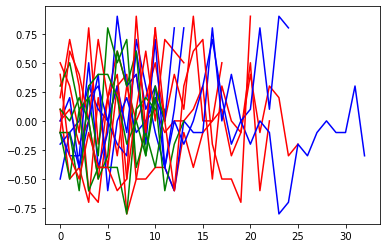

In [235]:
#【鬼滅の刃】あつ森初心者にもしも連れてきた我妻善逸が本物の声優さんと見せかけて声真似だったらドッキリ仕掛けたら、
#想像を絶する展開にwwwww【あつまれどうぶつの森鬼滅の刃声真似】_emotion.csv
x14=data14["Unnamed: 0"]
y14=data14["G_score"]#1831057　　228.0270237


x13 = data13["Unnamed: 0"]
y13 = data13["G_score"] #391408　48.74321295【あつ森】無料隠しアップデート今すぐ絶対に知らないと損な事・知っておきたい事14選!! これを知っているだけで差がつくマイルの貯め方や任天堂が炎上している件についてww【あつまれどうぶつの森攻略】_emotion.csv', 391408　　　　　　　　　　

x12 = data12["Unnamed: 0"]
y12 = data12["G_score"]#382152　47.59053549【あつ森】本当は教えたくない知っているだけで差がつく5つ星島まで最短で行く方法!! 初心者必見!!【あつまれどうぶつの森攻略】_emotion.csv',382152回　47.59053549


x11 = data11["Unnamed: 0"]
y11 = data11["G_score"] #　339320 42.25653798　【あつ森】発狂キッズにかくれんぼするフリをして、家の前に落とし穴を設置して罠にはめるドッキリwwww【あつまれどうぶつの森あっきぃドッキリ 】_emotion.csv',


x10 = data10["Unnamed: 0"]
y10 = data10["G_score"]#787302回 98.04508095　【あつ森】知らないと損するお金無限増殖バグをやってみた結果_emotion.csv 

x9 = data9["Unnamed: 0"]
y9 = data9["G_score"]#1131493回 140.9082192【あつ森】千と千尋の神隠しを完全再現した島クリエイターの本気の島が冗談抜きですごすぎたんだがwww【あつまれどうぶつの森animal crossing Spirited Away】_emotion.csv 

x8 = data8["Unnamed: 0"]
y8 = data8["G_score"]#250364回 　31.17858032【あつ森】最新アプデで追加の新イベントメーデー旅行券の離島ツアーが謎解き迷路でクリアしたら限定商品とお金が貰える神イベントすぎたwwww【あつまれどうぶつの森みしらぬネコ新離島ツアー】_emotion.csv 

x7 = data7["Unnamed: 0"]
y7 = data7["G_score"]#　607231回   75.62029888　あつ森】ヤンキーの島で激レアアイテムを奪ったら、ブチギレて大変なことになったんだがww【あつまれどうぶつの森鬼滅の刃 鬼ごっこ】_emotion.csv' 

x6 = data6["Unnamed: 0"]
y6 = data6["G_score"]#738834回     92.00921544　あつ森】ハリー・ポッターのホグワーツ城や名シーンを完全再現した島クリエイターの本気の島が想像を絶する凄さだったww ホグワーツに入学【あつまれどうぶつの森Harry Potter スリザリン】_emotion.csv' 

x5 = data5["Unnamed: 0"]
y5 = data5["G_score"]#3245220回　404.1369863あつ森】Twitterで約400万再生された島クリエイターの本気の島がガチで想像を絶するヤバさだった。もう現実世界なんだがww【あつまれどうぶつの森】_emotion.csv 

x4 = data4["Unnamed: 0"]
y4 = data4["G_score"]#1371495回　　170.7963885【あつ森】100万ベル盗んで世界一ヤバイ刑務所に閉じ込められたから、全力で脱獄する脱獄ゲームが面白すぎたwww【あつまれどうぶつの森脱獄ゲーム】_emotion.csv' 

x3 = data3["Unnamed: 0"]
y3 = data3["G_score"]#　643879回　　80.18418431あつ森】60年後の世界に行って、住人に話しかけたら本当に大変なことが起きていた。。【あつまれどうぶつの森】_emotion.csv' 

x2 = data2["Unnamed: 0"]
y2 = data2["G_score"]#1683024回　　209.5920299あつ森】”鬼滅の刃”を完全再現した島クリエイターの本気の島が想像を絶する凄さだったんだがwww 機能回復訓練やあの名シーンが・・【あつまれどうぶつの森鬼滅の刃 炭治郎鬼 善逸　冨岡義勇 】_emotion.csv',　　

x1 = data["Unnamed: 0"]
y1= data["G_score"]# 1167568回　　145.4007472あつ森】鬼滅の刃のキャラ達と隠れんぼしたら、炭治郎が99_emotion.csv 

# plt.plot(x1, y1, color = 'red', marker = 'o')
# plt.plot(x2, y2, color = 'blue', marker = 'v')

#  (a)50万以下green、(b)５０以上１００万blue、(c)100万以上red

#50以下　　　　　


plt.plot(x1, y1, color = 'red')#1167568　c  145.4007472   5
plt.plot(x2, y2, color = 'red')#1683024　c  209.5920299 　3
plt.plot(x3, y3, color = 'blue')#643879　b  80.18418431    9
plt.plot(x4, y4, color = 'red')#1371495　c  170.7963885   4
plt.plot(x5, y5, color = 'red')#3245220　c  404.1369863  1
plt.plot(x6, y6, color = 'blue')#738834　b   92.00921544   8
plt.plot(x7, y7, color = 'blue')#607231　b    75.62029888　10
plt.plot(x8, y8, color = 'green')#250364　a  31.17858032   14
plt.plot(x9, y9, color = 'red')#1131493  c    140.9082192   6
plt.plot(x10, y10, color = 'blue')#787302 b   98.04508095  7
plt.plot(x11, y11, color = 'green')#339320 a  42.25653798  13
plt.plot(x12, y12, color = 'green')#382152 a  47.59053549  12
plt.plot(x13, y13, color = 'green')#391408 a 48.74321295  11
plt.plot(x14, y14, color = 'red')#1831057 c  228.0270237  2


plt.show()

高再生数
#変動が短時間に大きく動く
#比較的0あたりから始まる動画が多い
#再生時間が長短両方ある。

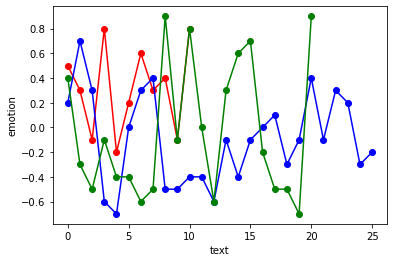

In [252]:
plt.plot(x5, y5, color = 'r',marker = 'o')#3245220　c 1
plt.plot(x2, y2, color = 'b',marker = 'o')#1683024　c 2
plt.plot(x14, y14, color = 'g',marker = 'o')#1831057 c 3

plt.xlabel('text')
plt.ylabel('emotion')
plt.show()

Text(0, 0.5, 'emotion')

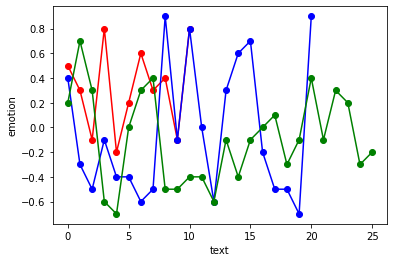

In [299]:
# plt.plot(x1, y1, color = 'red')#1167568　c
# plt.plot(x2, y2, color = 'red')#1683024　c
# plt.plot(x4, y4, color = 'red')#1371495　c
# plt.plot(x5, y5, color = 'red')#3245220　c
# plt.plot(x9, y9, color = 'red')#1131493  c
# plt.plot(x14, y14, color = 'red')#1831057 c

# plt.plot(x1, y1, color = 'm',marker = 'o')#1167568　c
# plt.plot(x2, y2, color = 'g',marker = 'o')#1683024　c
# plt.plot(x4, y4, color = 'c',marker = 'o')#1371495　c
# plt.plot(x5, y5, color = 'r',marker = 'o')#3245220　c
# plt.plot(x9, y9, color = 'y',marker = 'o')#1131493  c
# plt.plot(x14, y14, color = 'b',marker = 'o')#1831057 c
##########################################################
#view_reised
# plt.plot(x5, y5, color = 'red',marker = 'o')#3245220　c  404.1369863  1
# plt.plot(x14, y14, color = 'red',marker = 'o')#1831057 c  228.0270237  2
# plt.plot(x2, y2, color = 'red',marker = 'o')#1683024　c  209.5920299 　3
# plt.plot(x4, y4, color = 'red',marker = 'o')#1371495　c  170.7963885   4
# plt.plot(x1, y1, color = 'red',marker = 'o')#1167568　c  145.4007472   5


plt.plot(x5, y5, color = 'red',marker = 'o')#3245220　c  404.1369863  1
plt.plot(x14, y14, color = 'blue',marker = 'o')#1831057 c  228.0270237  2
plt.plot(x2, y2, color = 'green',marker = 'o')#1683024　c  209.5920299 　3
# plt.plot(x4, y4, color = 'y',marker = 'o')#1371495　c  170.7963885   4
# plt.plot(x1, y1, color = 'm',marker = 'o')#1167568　c  145.4007472   5

plt.xlabel('text')
plt.ylabel('emotion')

中再生数
#動画の傾向として感情得点が右肩上がりになっているものが多い


Text(0, 0.5, 'emotion')

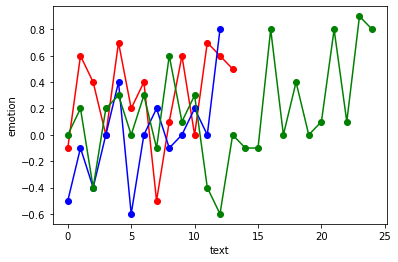

In [272]:
# plt.plot(x3, y3, color = 'blue')#643879　b
# plt.plot(x6, y6, color = 'blue')#738834　b
# plt.plot(x7, y7, color = 'blue')#607231　b
# plt.plot(x10, y10, color = 'blue')#787302 b

# plt.plot(x3, y3, color = 'blue',marker = 'o')#643879　b
# plt.plot(x6, y6, color = 'blue',marker = 'o')#738834　b
# plt.plot(x7, y7, color = 'blue',marker = 'o')#607231　b
# plt.plot(x10, y10, color = 'blue',marker = 'o')#787302 b

# plt.plot(x10, y10, color = 'r',marker = 'o')#787302 b 1
# plt.plot(x6, y6, color = 'b',marker = 'o')#738834　b 2
# plt.plot(x3, y3, color = 'g',marker = 'o')#643879　b 3
# plt.plot(x7, y7, color = 'm',marker = 'o')#607231　b
################################################
#view_revised

plt.plot(x9, y9, color = 'red',marker = 'o')#1131493  c    140.9082192   6
plt.plot(x10, y10, color = 'blue',marker = 'o')#787302 b   98.04508095  7
plt.plot(x6, y6, color = 'g',marker = 'o')#738834　b   92.00921544   8
# plt.plot(x3, y3, color = 'y',marker = 'o')#643879　b  80.18418431    9
# plt.plot(x7, y7, color = 'm',marker = 'o')#607231　b    75.62029888　10

plt.xlabel('text')
plt.ylabel('emotion')

低再生数
短時間で終わるものが多い。（speech to textで文章が長く取られたという原因もあるかもしれないが、再生数でまとめて見てこれ）
比較的なだらかで、弧を描くような曲線が見える。

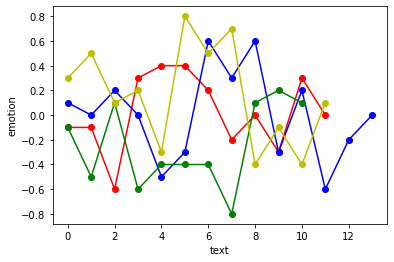

In [277]:
# plt.plot(x8, y8, color = 'green')#250364　a
# plt.plot(x11, y11, color = 'green')#339320 a
# plt.plot(x12, y12, color = 'green')#382152 a
# plt.plot(x13, y13, color = 'green')#391408 a


# plt.plot(x8, y8, color = 'green',marker = 'o')#250364　a
# plt.plot(x11, y11, color = 'green',marker = 'o')#339320 a
# plt.plot(x12, y12, color = 'green',marker = 'o')#382152 a
# plt.plot(x13, y13, color = 'green',marker = 'o')#391408 a

# plt.plot(x8, y8, color = 'y',marker= 'o')    #250364　a
# plt.plot(x11, y11, color = 'g',marker = 'o')#339320 a 3
# plt.plot(x12, y12, color = 'b',marker = 'o')#382152 a 2
# plt.plot(x13, y13, color = 'r',marker = 'o')#391408 a 1


###################################################
# view_revised　最下位層


plt.plot(x13, y13, color = 'r',marker= 'o')#391408 a 48.74321295  11
plt.plot(x12, y12, color = 'b',marker= 'o')#382152 a  47.59053549  12
plt.plot(x11, y11, color = 'g',marker= 'o')#339320 a  42.25653798  13
plt.plot(x8, y8, color = 'y',marker= 'o')#250364　a  31.17858032   14

plt.xlabel('text')
plt.ylabel('emotion')
plt.show()

#短時間のもの

Text(0, 0.5, 'emotion')

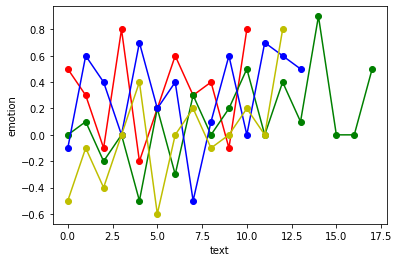

In [298]:

plt.plot(x5, y5, color = 'red',marker = 'o')#3245220　c  404.1369863  1
plt.plot(x4, y4, color = 'g',marker = 'o')#1371495　c  170.7963885   4　　15文で少し多く、右肩上がりのグラフ

plt.plot(x9, y9, color = 'b',marker = 'o')#1131493  c    140.9082192   6　　　　ポジティブ帯域が多く占める
plt.plot(x10, y10, color = 'y',marker = 'o')#787302 b   98.04508095  7　　　ネガティブ始まり

# plt.plot(x13, y13, color = 'y',marker= 'o')#391408 a 48.74321295  11　　　　ニュートラルネガティブ
# plt.plot(x12, y12, color = 'm',marker= 'o')#382152 a  47.59053549  12　　
# plt.plot(x11, y11, color = 'c',marker= 'o')#339320 a  42.25653798  13           ネガティブ帯が多く占める
# plt.plot(x8, y8, color = 'k',marker= 'o')#250364　a  31.17858032   14　　　　　ポジティブ始まり


plt.xlabel('text')
plt.ylabel('emotion')

In [217]:
#文章の長さが人や動画によって変わるので精度が安定しない、文章を区切れていない状態での比較は難しいかもしれない

In [212]:
#ぽんすけ
ponsuke = pd.read_csv('point/ぽんすけ_data.csv',encoding = 'UTF8')
ponsuke


,Unnamed: 0,player_name,title,bpm,stdev,bigining,middle,last,frequency,decibel,subscribers,view,view_revised,time
0,0,ぽんすけ,【あつまれ どうぶつの森】全住民383人の人気ランキング！TOP10に入ったのは一体誰だ!【...,131.681546599999990121432347223162651062011718...,22.2652159800000006839582056272774934768676757...,25.3549695700000015108344086911529302597045898...,17.4949290099999998915336618665605783462524414...,0.00000000000000000000000000000000000000000000...,388.39472729999999955907696858048439025878906250,-17.7840308799999995414964359952136874198913574...,138000,570194,413.184057999999993171513779088854789733886718...,485.80789119999997183185769245028495788574218750
1,1,ぽんすけ,【あつ森 実況】 自分の家を最大まで増築した結果、こうなった【あつまれ どうぶつの森】【ぽんすけ】,130.469427899999999453939381055533885955810546...,25.2785436499999995874077285407111048698425292...,14.5888594200000003553441274561919271945953369...,22.2148541100000009862469596555456519126892089...,0.00000000000000000000000000000000000000000000...,496.25115779999998721905285492539405822753906250,-17.5927312299999982769804773852229118347167968...,138000,135313,98.0528985499999947705873637460172176361083984...,378.06730160000000751097104512155055999755859375
2,2,ぽんすけ,【あつ森 実況】10分で30万円の金策が最強効率か! 噂のタランチュラ無限湧き島でお金稼ぎ!...,130.068536399999999275678419508039951324462890...,18.4382707100000011735119187505915760993957519...,0.00000000000000000000000000000000000000000000...,22.5155279499999991799086274113506078720092773...,0.00000000000000000000000000000000000000000000...,435.98467779999998583662090823054313659667968750,-18.0154757500000002323758963029831647872924804...,138000,742097,537.751449299999990216747391968965530395507812...,396.20208619999999655192368663847446441650390625
3,3,ぽんすけ,【あつ森 実況】『普通のあみ＆釣竿』と『カラフルなあみ＆釣竿』の耐久値ってどっちが高いの？一...,123.809110400000008667120710015296936035156250...,12.9037039300000007102653398760594427585601806...,0.00000000000000000000000000000000000000000000...,11.1803519100000006147865860839374363422393798...,0.00000000000000000000000000000000000000000000...,558.78509150000002136948751285672187805175781250,-17.9043727600000011079828254878520965576171875...,138000,112554,81.5608695699999941552960081025958061218261718...,355.12598639999993110905052162706851959228515625
4,4,ぽんすけ,【あつ森 実況】みんなこれ知ってる？時間操作を使ったお金稼ぎの方法解説！【あつまれ どうぶつ...,125.488139899999993076562532223761081695556640...,23.3056058200000002500473783584311604499816894...,0.00000000000000000000000000000000000000000000...,17.2155688600000011945212463615462183952331542...,7.48502994000000043683940020855516195297241210...,646.86194199999999909778125584125518798828125000,-18.0242269899999989490879670483991503715515136...,138000,304073,220.342753599999980451684677973389625549316406...,347.48662130000002434826456010341644287109375000
5,5,ぽんすけ,【あつ森 実況】時間操作無し！お金ベルを稼ぐ最強金策方法はこれだ！！【あつまれ どうぶつの森...,132.033994299999989152638590894639492034912109...,17.3577773200000002873366611311212182044982910...,0.00000000000000000000000000000000000000000000...,27.4327122199999990925789461471140384674072265...,31.0559006199999991792992659611627459526062011...,453.14389999999997371560311876237392425537109375,-17.6520117499999997789927874691784381866455078...,138000,529623,383.784782600000028196518542245030403137207031...,237.98131519999998317871359176933765411376953125
6,6,ぽんすけ,【あつ森】1度しか手に入らないであろう金のパチンコのレシピを水に落としてみたらどうなるの？【...,127.856082299999982865301717538386583328247070...,22.7248744900000012592045095516368746757507324...,10.4529616700000005380388756748288869857788085...,13.0662020900000008793995220912620425224304199...,54.5876887300000035452285374049097299575805664...,666.30303070000002207962097600102424621582031250,-17.3050688999999984218902682187035679817199707...,138000,183466,132.946376799999995910184225067496299743652343...,435.88498870000000806612661108374595642089843750
7,7,ぽんすけ,【あつ森】あつ森ガチ勢が本気を出して作った島がオシャレ過ぎてヤバいｗｗｗ島クリエイターのプロ...,134.573012300000016239209799095988273620605468...,22.9897965900000009753512131283059716224670410...,0.00000000000000000000000000000000000000000000...,16.68653159000000130163

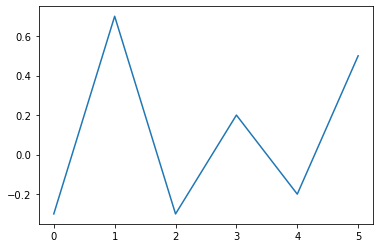

In [192]:
pon= pd.read_csv('point/ぽんすけ /【あつ森 実況】『普通のあみ＆釣竿』と『カラフルなあみ＆釣竿』の耐久値ってどっちが高いの？一挙検証！【あつまれ どうぶつの森】【ぽんすけ】_emotion.csv',encoding = 'UTF8')
#dataを出力 
pon["G_score"].plot()

In [216]:
# pon2= pd.read_csv('point/ぽんすけ /*.csv',encoding = 'UTF8')
# #dataを出力 
# pon2["G_score"].plot()

In [99]:
#分布から見た基準決め
#高再生数
#低再生数
#両方

#急降下上昇するもの
#時間が短いもの長いもの